In [8]:
!pip install pandas seaborn xlsxwriter openpyxl scikit-learn==1.0.2

Defaulting to user installation because normal site-packages is not writeable


## Import libraries
We are using a new library called scikit-learn, originally created and released for free by researchers at the French national laboratory INRIA.

In [56]:
import numpy as np
import pandas as pd

import sklearn.pipeline
import sklearn.feature_extraction.text
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.metrics

## Load data
This is expecting an excel file named ```training.xlsx```. You can change your file name or change the name inside the quotes to match.

__This will expect that your input text is in the first column and your label/output in the second column__

In [57]:
data = pd.read_excel("training.xlsx")

In [58]:
data

,input,output
0,Can’t wait until summer break!,happy
1,Coffee,happy
2,Coffee always makes my day.,happy
3,Coffee makes mehappy,happy
4,Cold brew is good,happy
...,...,...
156,Ugh no good,sad
157,"Ugh, this sucks",sad
158,"Uh-oh, this isn’t good",sad
159,when is it my turn to behappy,sad


In [59]:
data.columns

Index(['input', 'output'], dtype='object')

In [60]:
data['output'].value_counts()

output
sad      81
happy    80
Name: count, dtype: int64

## Split into training and testing datasets
We want to randomly select 80% of this data to use to train the model, then use the remaining 20% to test how good the model is on examples it has not seen before.

In [61]:
input_train, input_test, output_train, output_test = sklearn.model_selection.train_test_split(data['input'], 
                                                                                             data['output'], 
                                                                                             test_size=0.2)

In [62]:
len(input_train), len(input_test)

(128, 33)

## Create a blank model from a three-part pipeline and then train it with `model.fit()`


In [63]:
model = sklearn.pipeline.Pipeline([
    ('vect', sklearn.feature_extraction.text.CountVectorizer()),
    ('tfidf', sklearn.feature_extraction.text.TfidfTransformer()),
    ('clf', sklearn.naive_bayes.MultinomialNB()),
])


In [64]:
model.fit(input_train, output_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

## Testing the model on the other 20% of data
Remember the `input_test` dataset? We will use the `model.predict()` function to score those 1035 emails.

In [72]:
output_predicted = model.predict(input_test)

In [73]:
results = pd.DataFrame(output_predicted)
results.columns = ['output_predicted']
results

,output_predicted
0,sad
1,happy
2,sad
3,sad
4,happy
5,sad
6,happy
7,sad
8,happy
9,sad


Remember that the 'true' labels for these are in `output_test`. They are in a slightly different format (array displayed horizontally versus a column displayed horizontally), but they are easy for the computer to compare.

In [74]:
results['original_label'] = list(output_test)
results['text'] = list(input_test)
results

,output_predicted,original_label,text
0,sad,sad,the people in Germany are mean
1,happy,sad,I was late for class this morning
2,sad,sad,I am worried about my grades.
3,sad,sad,No good very bad day
4,happy,happy,I ate frosted flakes this morning for breakfast!!
5,sad,sad,The parking is expensive
6,happy,happy,I had so much fun in France
7,sad,sad,Germany is lame
8,happy,sad,I got stuck in traffic
9,sad,sad,"Ugh, this sucks"


We can use `model.score()` by first inputting the 'true' labels, then the predictions. We get a percentage of the model's __accuracy__:

$accuracy = \frac{\mbox{number of correct predictions}}{\mbox{total number of items predicted}}$

In [76]:
print(model.score(output_test, output_predicted))

0.8181818181818182


## The Confusion Matrix

But accruacy alone doesn't tell us everything: there could be way more false positives than false negatives. So we use the ___confusion matrix___, which is a 2x2 table of what kinds of correct vs incorrect predictions were made:

__NOTE: If you have more than two categories to predict, your confusion matrix will more complicated than a 2x2. The `tp, fn, fp, tn...` code won't work, but the next cell plotting the confusion matrix will work.__

In [77]:
confusion_matrix = sklearn.metrics.confusion_matrix(output_test, output_predicted, labels=model.classes_)
confusion_matrix

array([[15,  1],
       [ 5, 12]])

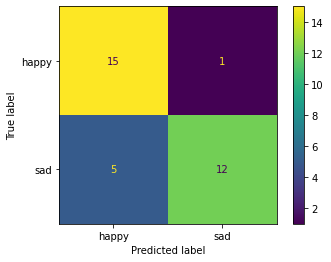

In [78]:
display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
display.plot()


# Metrics of success and failure

___For lab: keep these if you only have two categories, delete if you have more___

In [79]:
tp, fn, fp, tn = confusion_matrix.flatten()
tp, fn, fp, tn

(15, 1, 5, 12)

In [80]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8181818181818182

In [81]:
precision = tp / (tp + fp)
precision

0.75

In [82]:
recall = tp / (tp + fn)
recall

0.9375

In [83]:
specificity = tn / (tn + fp)
specificity

0.7058823529411765

## Manually exploring a few cases

Edit this list to add five or more text inputs that make sense for your model. It could be from the original dataset, or it could be something you come up with on your own.

In [ ]:
text_list = ['I am in France',
             'I am in Germany',
             'I love France',
             'I love Germany']

In [96]:
scores = model.predict_proba(text_list)
scores

array([[0.71235138, 0.28764862],
       [0.23887334, 0.76112666],
       [0.92263167, 0.07736833],
       [0.47765711, 0.52234289]])

In [99]:
scores_dataframe = pd.DataFrame(scores, columns=model.classes_)
scores_dataframe['text'] = text_list
scores_dataframe

,happy,sad,text
0,0.712351,0.287649,I am in France
1,0.238873,0.761127,I am in Germany
2,0.922632,0.077368,I love France
3,0.477657,0.522343,I love Germany


## Scoring a new text dataset with no labels

This will only look at the first column and score all text according to the model trained above.

In [101]:
df_to_score = pd.read_excel("text_to_score.xlsx")

In [105]:
df_to_score.iloc[:, 0]

0          **For Agent Jack Raze Only. STOP. Do Not Read**
1                               *NSYNC Vs. Backstreet Boys
2        #CampingWithDogs Will Give You The Cutest Case...
3                    #ChickenTweet As Motivational Posters
4        #COCKROACHESANDCHER Is The Most Important Hash...
                               ...                        
31995                          Zimbabwean unity talks fail
31996    Zimmerman stands before judge for the Trayvon ...
31997    Zoo elephants live shorter lives than their wi...
31998    Zoombak Tracks Your Dog, Your Car, Even Your C...
31999                  Zuma Faces New Charges After Ruling
Name: headline, Length: 32000, dtype: object

In [109]:
scores = model.predict_proba(df_to_score.iloc[:, 0])
scores_df = pd.DataFrame(scores, columns=model.classes_)
prediction = model.predict(df_to_score.iloc[:, 0])
scores_df['prediction'] = prediction
scores_df['text'] = df_to_score.iloc[:, 0]


scores_df

,happy,sad,prediction,text
0,0.433324,0.566676,sad,**For Agent Jack Raze Only. STOP. Do Not Read**
1,0.500000,0.500000,happy,*NSYNC Vs. Backstreet Boys
2,0.614195,0.385805,happy,#CampingWithDogs Will Give You The Cutest Case...
3,0.500000,0.500000,happy,#ChickenTweet As Motivational Posters
4,0.554260,0.445740,happy,#COCKROACHESANDCHER Is The Most Important Hash...
...,...,...,...,...
31995,0.500000,0.500000,happy,Zimbabwean unity talks fail
31996,0.503506,0.496494,happy,Zimmerman stands before judge for the Trayvon ...
31997,0.408324,0.591676,sad,Zoo elephants live shorter lives than their wi...
31998,0.500000,0.500000,happy,"Zoombak Tracks Your Dog, Your Car, Even Your C..."


In [110]:
scores_df.to_excel("scored_results.xlsx")